# Proyecto de Fin de Curso

## Limpieza de Datos Climaticos Con Ruido

### Por: Sergio Rodrigo Cárdenas Rivera

### 0. Instalación e Importación de librerias 

In [ ]:
!pip install pandas
# !pip install scikit-learn
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 450.1 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.5 MB/s eta 0:00:004.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.6/269.6 kB 3.5 MB/s eta 0:00:00m eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.7 MB/s eta 0:00:003.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pi

In [308]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1. Limpieza y Correción de datos

In [309]:
df = pd.read_csv('clima_T1.csv')
df = df.drop(['Unnamed: 0', 'id_dato'], axis=1)
df.head()

,v_diodo_garita,v_bateria_garita,lux,mag_viento,dir_viento,hum,lluvia,temp,presion,adc0,adc1,adc2,fecha
0,167,582,1023,5.93,285.66,29.2,0,22.17,543.73,616,169,381,2022-10-01 00:03:39
1,167,582,1023,5.93,285.66,29.2,0,22.17,543.73,616,169,381,2022-10-01 00:09:05
2,167,582,1023,5.93,285.66,29.2,0,22.17,543.73,616,169,381,2022-10-01 00:14:28
3,167,582,1023,5.93,285.66,29.2,0,22.17,543.73,616,169,381,2022-10-01 00:19:51
4,167,582,1023,5.93,285.66,29.2,0,22.17,543.73,616,169,381,2022-10-01 00:25:17


##### Descripcion de las cabeceras

1. v_diodo_garita: Voltaje del diodo en la garita. Podría referirse a un sensor de referencia o a un componente que mide energía en el sensor principal.
2. v_bateria_garita: Voltaje de la batería en la garita (donde está el sensor). Indica el estado de la batería del sistema.
3. lux: Medición de la iluminación o intensidad de luz (en lux).
4. mag_viento: Magnitud o velocidad del viento. Generalmente se mide en m/s o km/h.
5. dir_viento: Dirección del viento. Suele indicarse en grados (0-360), donde 0 o 360 representa el norte.
6. hum: Humedad relativa del aire, normalmente en porcentaje (%).
7. lluvia: Cantidad de lluvia acumulada o tasa de precipitación, generalmente medida en mm.
8. temp: Temperatura, comúnmente en grados Celsius (°C).
9. presion: Presión atmosférica, usualmente en hPa (hectopascales) o mbar (milibares).
10. adc0, adc1, adc2: Valores obtenidos de entradas analógicas del conversor analógico-digital (ADC). Podrían ser medidas de sensores adicionales o datos sin procesar.
11. fecha: Fecha del registro de datos, usualmente en formato estándar (por ejemplo, AAAA-MM-DD o similar).

En base a estos detalles se elige solamente las siguientes columnas: mag_viento, hum, lluvia, temp, presion, fecha

In [ ]:
df = df[['mag_viento', 'hum', 'lluvia', 'temp', 'presion', 'fecha']]
# df['fecha'] = df['fecha'].apply(lambda x: pd.Timestamp(x.split(' ')[0]))
# a = df.groupby(['year', 'month', 'day']).count()
df['fecha'] = pd.to_datetime(df['fecha'])
df['month'] = df['fecha'].dt.month
df['year'] = df['fecha'].dt.year
df['day'] = df['fecha'].dt.day
df

,mag_viento,hum,lluvia,temp,presion,fecha,month,year,day
0,5.93,29.2,0,22.17,543.73,2022-10-01 00:03:39,10,2022,1
1,5.93,29.2,0,22.17,543.73,2022-10-01 00:09:05,10,2022,1
2,5.93,29.2,0,22.17,543.73,2022-10-01 00:14:28,10,2022,1
3,5.93,29.2,0,22.17,543.73,2022-10-01 00:19:51,10,2022,1
4,5.93,29.2,0,22.17,543.73,2022-10-01 00:25:17,10,2022,1
...,...,...,...,...,...,...,...,...,...
191315,1.22,99.9,0,15.96,547.64,2024-11-30 23:36:37,11,2024,30
191316,0.34,99.9,0,16.06,547.58,2024-11-30 23:41:59,11,2024,30
191317,2.19,99.9,0,15.93,547.55,2024-11-30 23:47:20,11,2024,30
191318,2.06,99.9,0,16.11,547.55,2024-11-30 23:52:42,11,2024,30


In [311]:
# determinamos que no se tiene ningun dato Nulo.
df.isnull().sum()

mag_viento    0
hum           0
lluvia        0
temp          0
presion       0
fecha         0
month         0
year          0
day           0
dtype: int64

In [ ]:
df[(df['year']>=2023) & (df['year']<=2024)]

,mag_viento,hum,lluvia,temp,presion,fecha,month,year,day
24288,3.38,70.7,0,16.07,547.76,2023-01-01 00:03:26,1,2023,1
24289,3.38,70.7,0,16.07,547.76,2023-01-01 00:08:52,1,2023,1
24290,3.38,70.7,0,16.07,547.76,2023-01-01 00:14:18,1,2023,1
24291,3.38,70.7,0,16.07,547.76,2023-01-01 00:19:41,1,2023,1
24292,3.38,70.7,0,16.07,547.76,2023-01-01 00:25:03,1,2023,1
...,...,...,...,...,...,...,...,...,...
191315,1.22,99.9,0,15.96,547.64,2024-11-30 23:36:37,11,2024,30
191316,0.34,99.9,0,16.06,547.58,2024-11-30 23:41:59,11,2024,30
191317,2.19,99.9,0,15.93,547.55,2024-11-30 23:47:20,11,2024,30
191318,2.06,99.9,0,16.11,547.55,2024-11-30 23:52:42,11,2024,30


In [439]:
def plot_data(dataframe, variable: str, etiqueta: str, color:str)->None:
  fig = plt.figure(figsize=(20,8))
  ax1 = fig.add_subplot(3,1,1)
  data=dataframe[dataframe['year']==2022]
  sns.lineplot(data=data,x = 'fecha', y = variable, label=etiqueta, color=color, linewidth = 1, linestyle = '-')
  plt.title(f"{etiqueta} - 2022", fontsize=16)
  plt.xlabel('Fecha')
  plt.ylabel(etiqueta)
  plt.grid()
  plt.tight_layout(h_pad=1.0)#fig.tight_layout(pad=5.0)

  ax2 = fig.add_subplot(3,1,2)
  data= dataframe[dataframe['year']==2023]
  sns.lineplot(data=data,x = 'fecha', y = variable, label=etiqueta, color=color, linewidth = 1, linestyle = '-')
  plt.title(f"{etiqueta} - 2023", fontsize=16)
  plt.xlabel('Fecha')
  plt.ylabel(etiqueta)
  plt.grid()
  plt.tight_layout(h_pad=1.0)

  ax3 = fig.add_subplot(3,1,3)
  data=dataframe[dataframe['year']==2024]
  sns.lineplot(data=data, x = 'fecha', y = variable, label=etiqueta, color=color, linewidth = 1, linestyle = '-')
  plt.title(f"{etiqueta} - 2024", fontsize=16)
  plt.xlabel('Fecha')
  plt.ylabel(etiqueta)
  plt .grid() #alpha=0.3

In [383]:
def print_percent_of_total(total_value: int, partial_value:int)->None:
  ans = partial_value * 100 / total_value
  print(f'{round(ans,2)}% of total data')

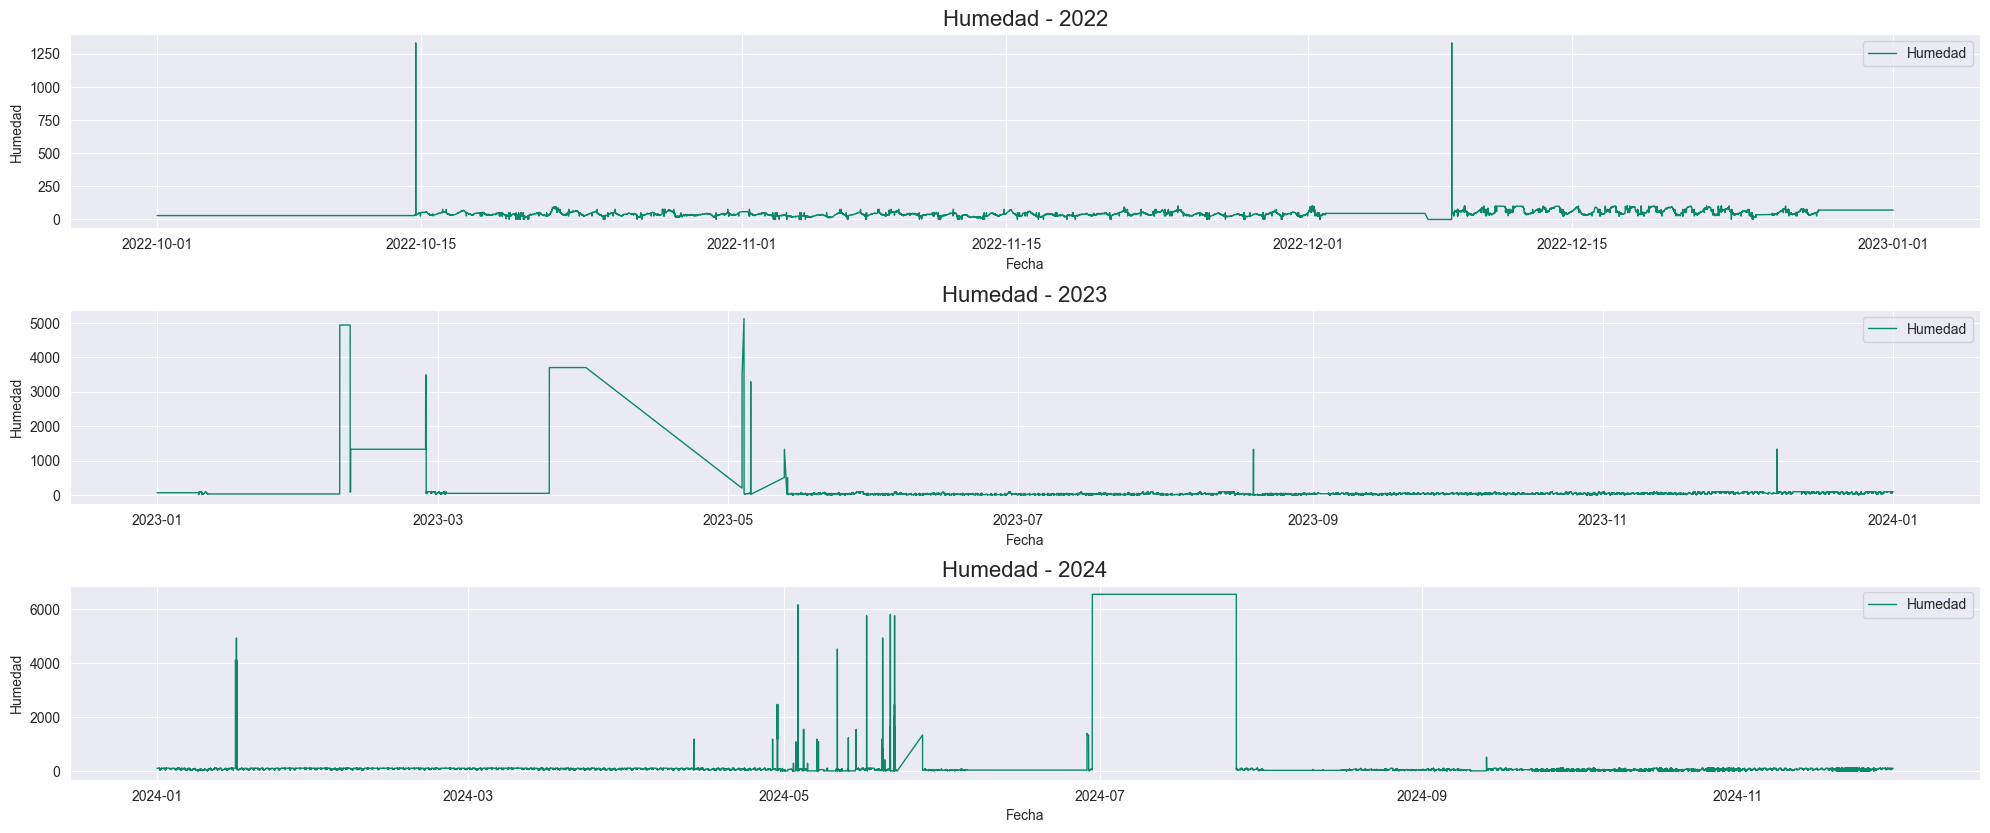

In [323]:
plot_data(df=df, variable='hum', etiqueta='Humedad', color="#088A68")

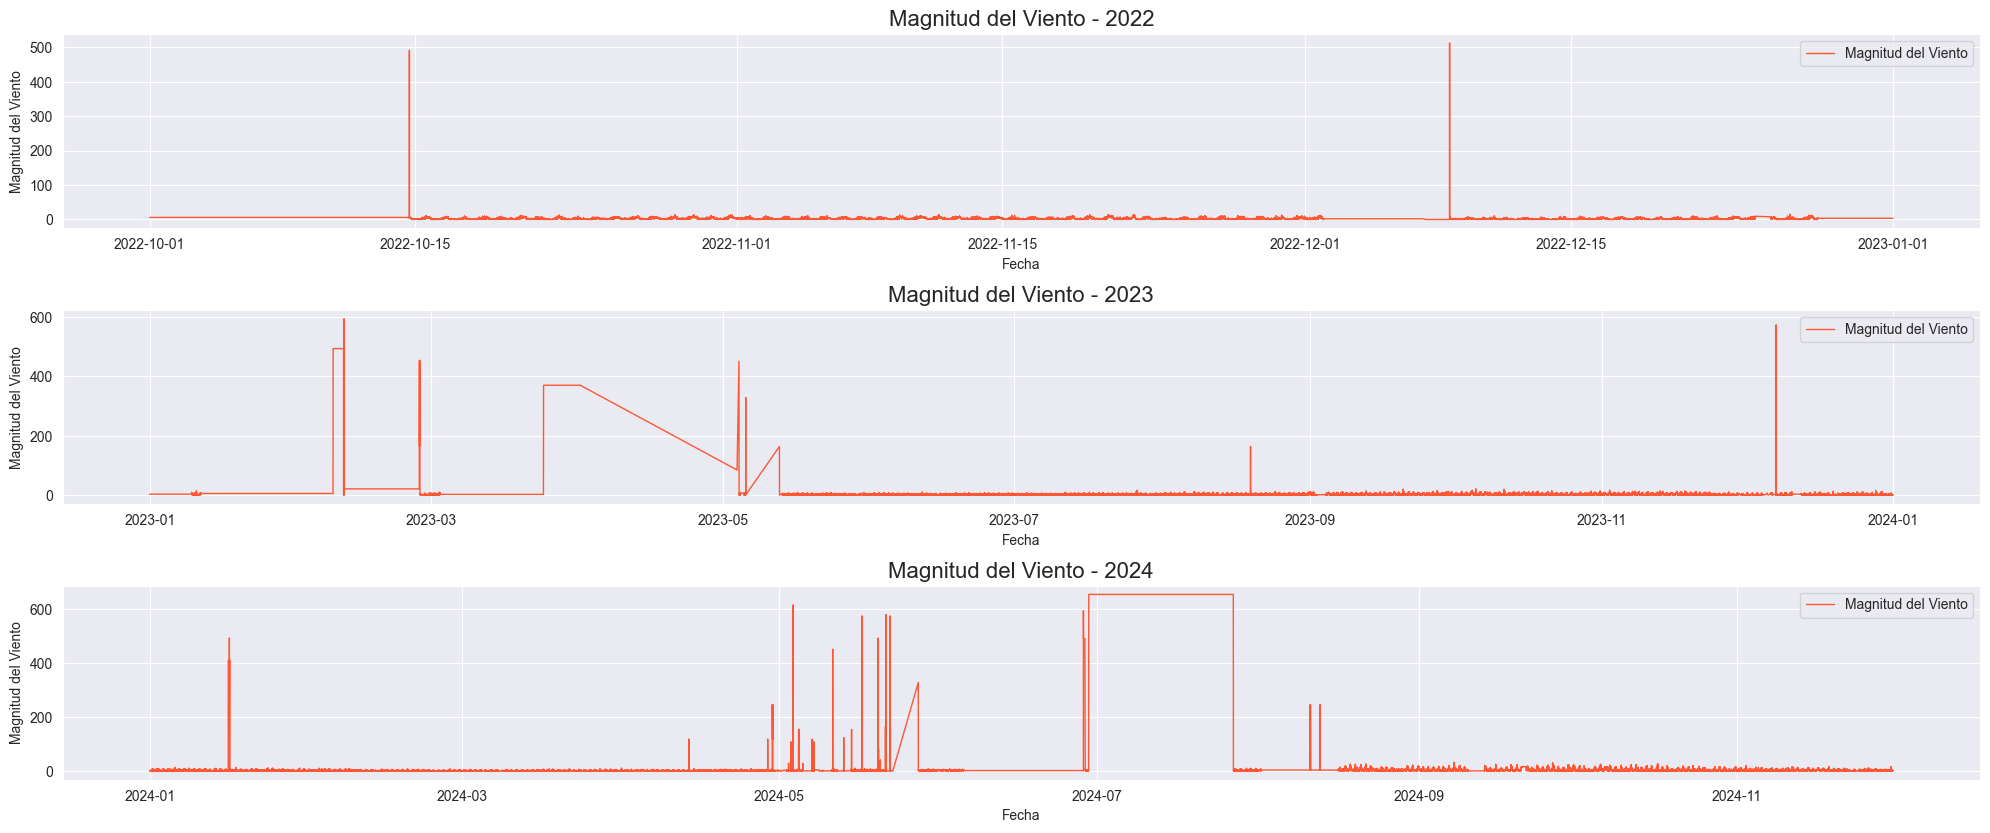

In [324]:
plot_data(df=df, variable='mag_viento', etiqueta='Magnitud del Viento', color="#ff5733")

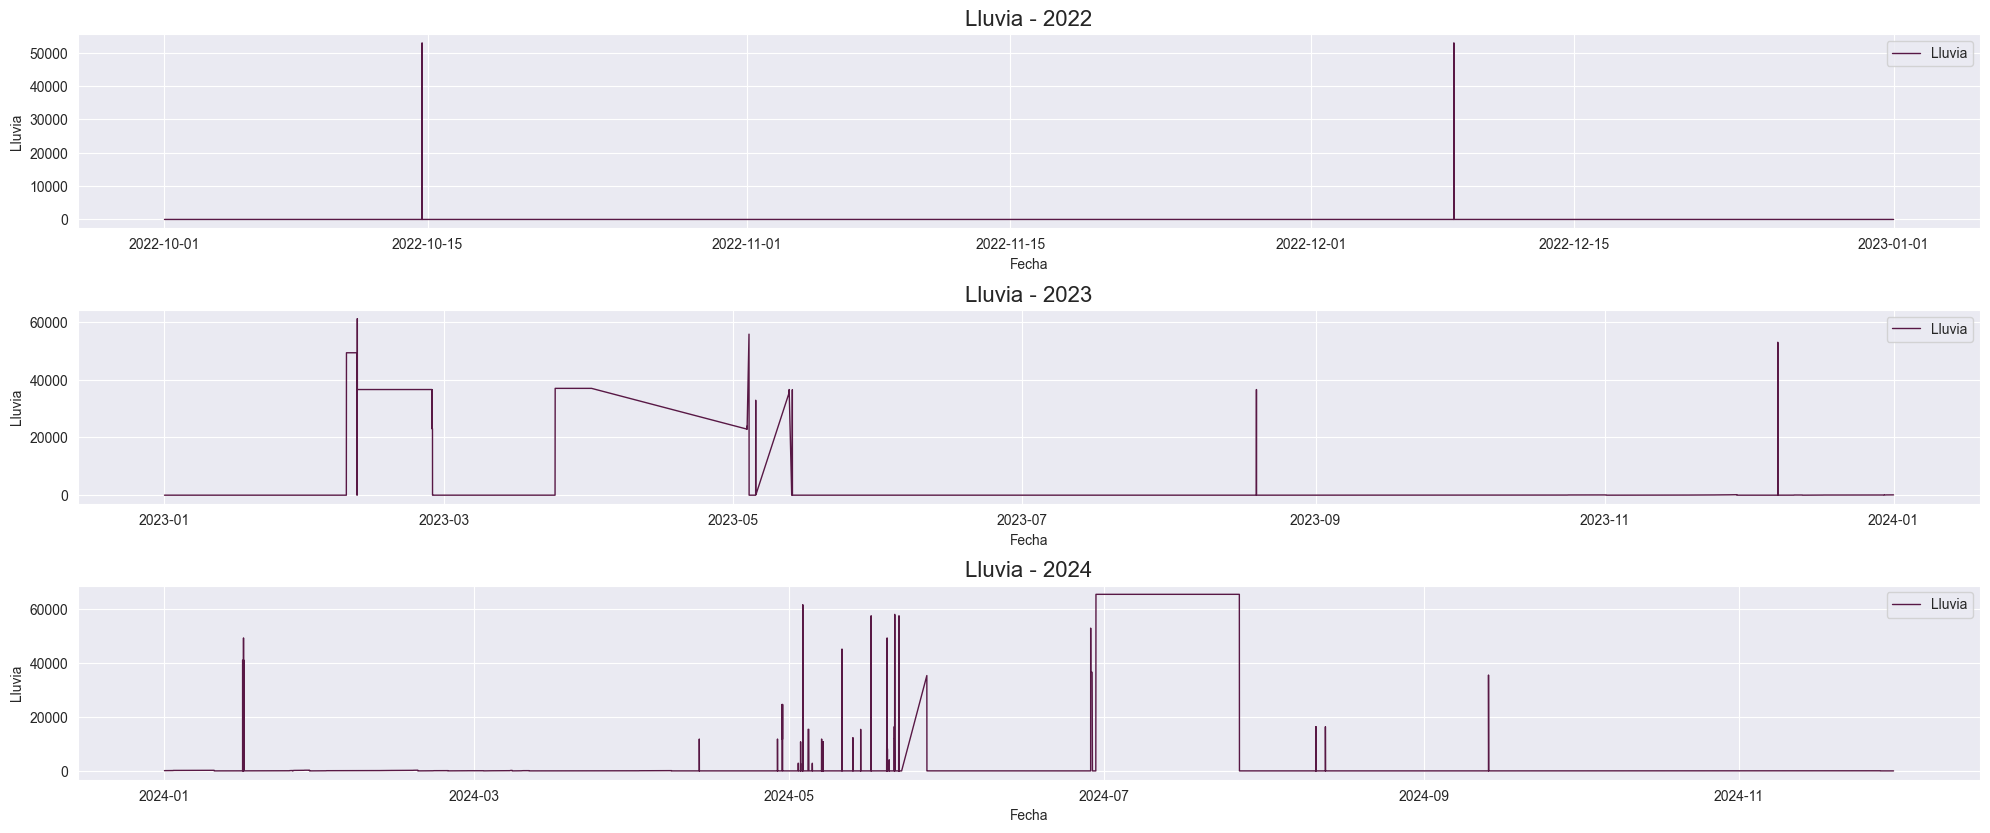

In [325]:
plot_data(df=df, variable='lluvia', etiqueta='Lluvia', color="#581845")

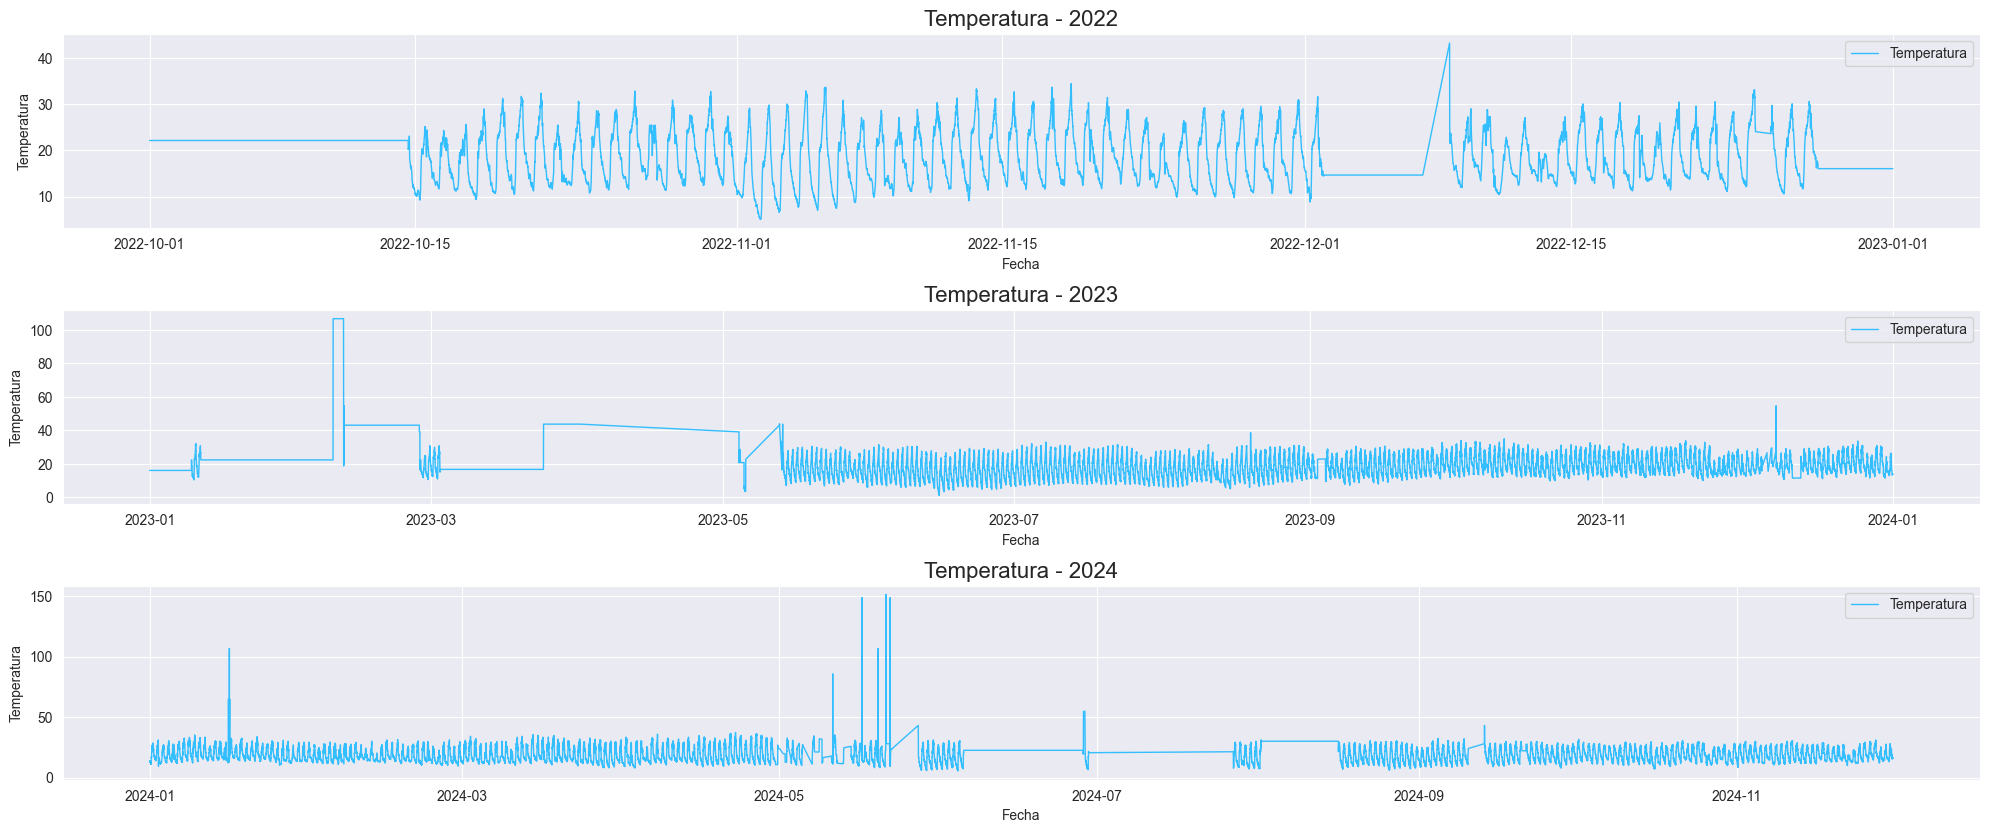

In [295]:
plot_data(df=df, variable='temp', etiqueta='Temperatura', color="#33beff")

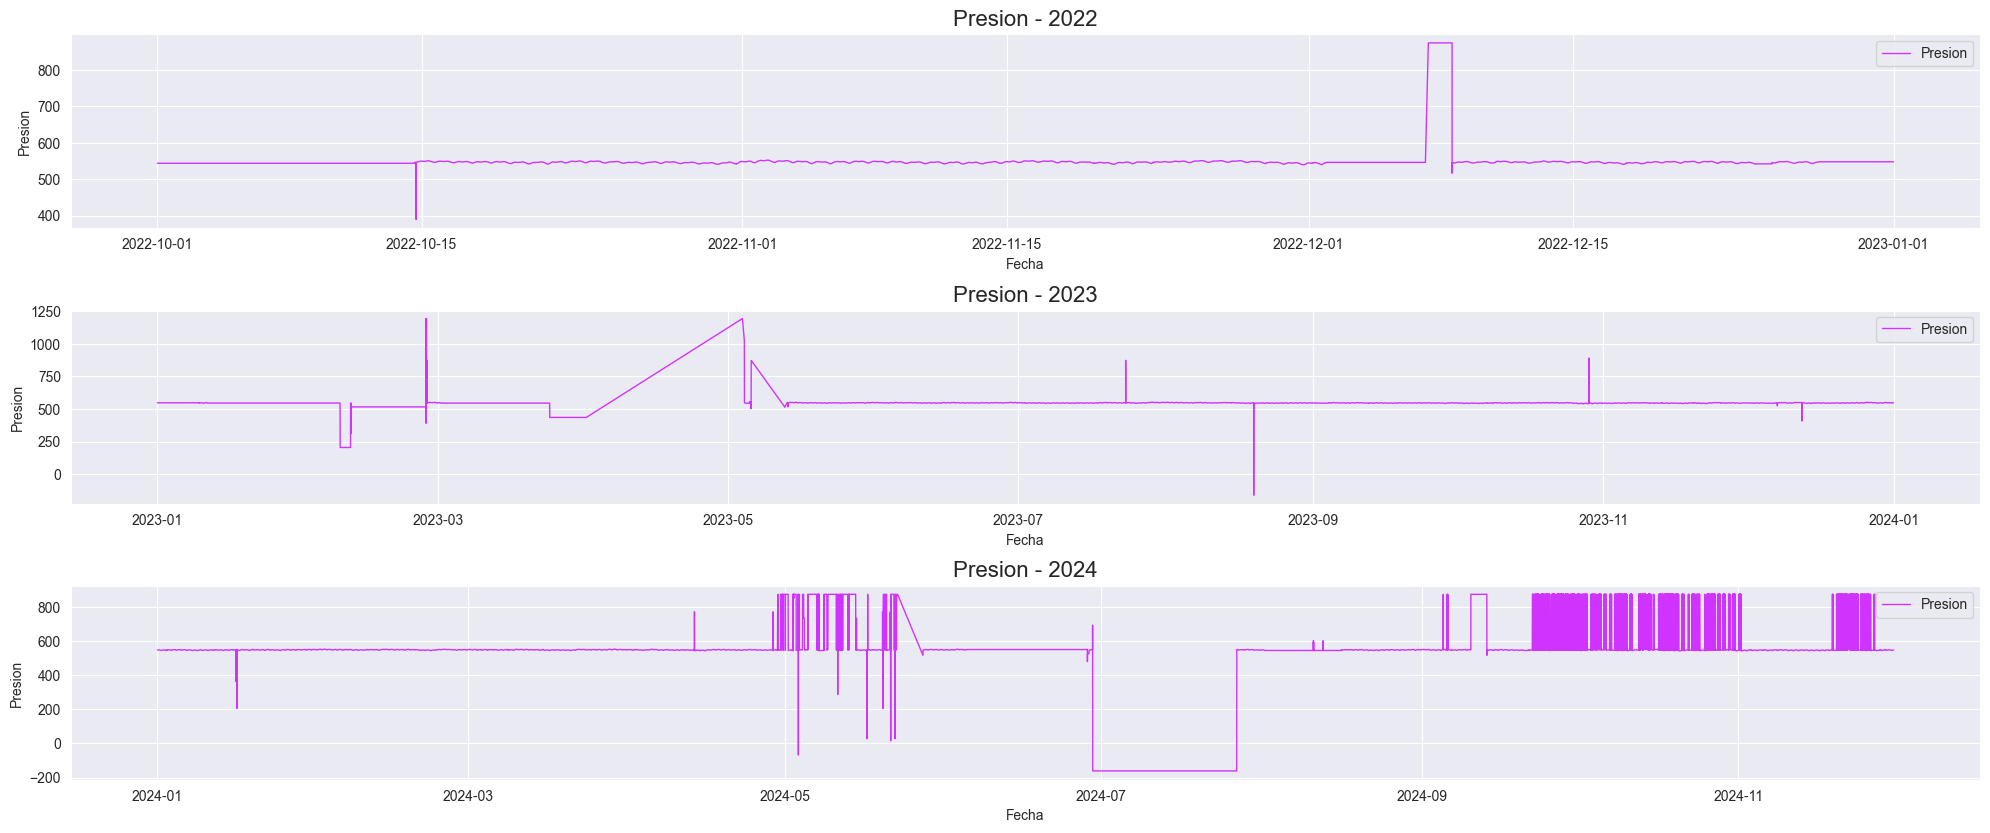

In [326]:
plot_data(df=df, variable='presion', etiqueta='Presion', color="#d133ff")

#### Limpiando los datos

In [387]:
cant_total_datos = len(df)
cant_total_datos

191320

In [328]:
# Humedad: El grado o la cantidad de humedad de aire se mide con el higrómetro.
# se debe filtrar los valores entre 0 - 100%
df['hum'].describe()

count    191320.000000
mean        372.371958
std        1303.935753
min           0.000000
25%          32.400000
50%          48.500000
75%          74.300000
max        6553.500000
Name: hum, dtype: float64

In [384]:
humedad_filtrada = df[(df['hum']>=100)]
print_percent_of_total(total_value= cant_total_datos, partial_value=len(humedad_filtrada))

7.5% of total data


In [388]:
# Magnitud del viento: Se mide con un anemómetro y se expresa en unidades como metros por segundo (m/s), 
# kilómetros por hora (km/h) o nudos (kn). 100 m/s = 360 km/h
df['mag_viento'].describe()

count    191320.000000
mean         32.674980
std         130.508129
min           0.000000
25%           0.860000
50%           2.200000
75%           4.260000
max         655.350000
Name: mag_viento, dtype: float64

<Axes: >

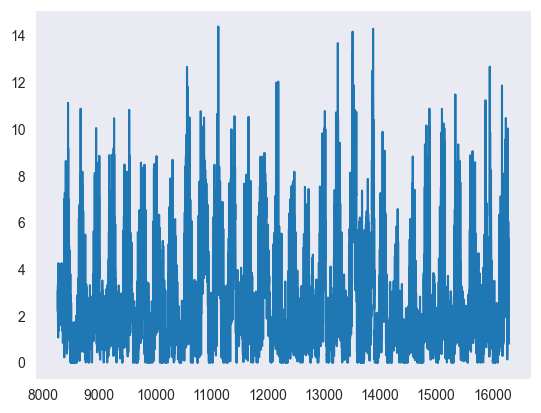

In [389]:
df[(df['year']==2022) & (df['month']==11)]['mag_viento'].plot()
# 14 m/s - vlocidad del viento

In [392]:
mag_viento_filtrado = df[(df['mag_viento']>20)] # 20m/s = 72 km/h viento muy fuerte, dificultad para caminar 
print_percent_of_total(total_value= cant_total_datos, partial_value=len(mag_viento_filtrado))

7.39% of total data


In [393]:
# Lluvia: La lluvia se mide en metros acumulados segun lo terrencial de la lluvia
# Lluvia ligera: 10 a 200 centésimas de mm (0.1 a 2 mm).(Lloviznas que apenas humedecen el suelo)
# Lluvia moderada: 200 a 1,000 centésimas de mm (2 a 10 mm). (Lluvias consistentes, típicas de una tormenta ligera.)
# Lluvia intensa: 1,000 a 5,000 centésimas de mm (10 a 50 mm). (Lluvias fuertes asociadas con tormentas o frentes de mal tiempo.)
# Lluvia torrencial: 5,000 a 10,000 centésimas de mm (50 a 100 mm) (Lluvias muy fuertes, comunes en tormentas tropicales)
df['lluvia'].describe()

count    191320.000000
mean       3787.295181
std       13964.587330
min           0.000000
25%           0.000000
50%           1.000000
75%          16.000000
max       65535.000000
Name: lluvia, dtype: float64

In [394]:
lluvia_filtrada = df[df['lluvia'] >= 10000]
print_percent_of_total(total_value= cant_total_datos, partial_value=len(lluvia_filtrada))

7.33% of total data


In [396]:
# Temperatura
temperatura_filtrada = df[df['temp'] >= 40]
print_percent_of_total(total_value= cant_total_datos, partial_value=len(temperatura_filtrada))

7.25% of total data


In [399]:
#Presion: se tomara en cuenta valores entre 500 hPa y 600 hPa
presion_filtrada = df[(df['presion'] < 500) | (df['presion']>600)]
print_percent_of_total(total_value= cant_total_datos, partial_value=len(presion_filtrada))

8.15% of total data


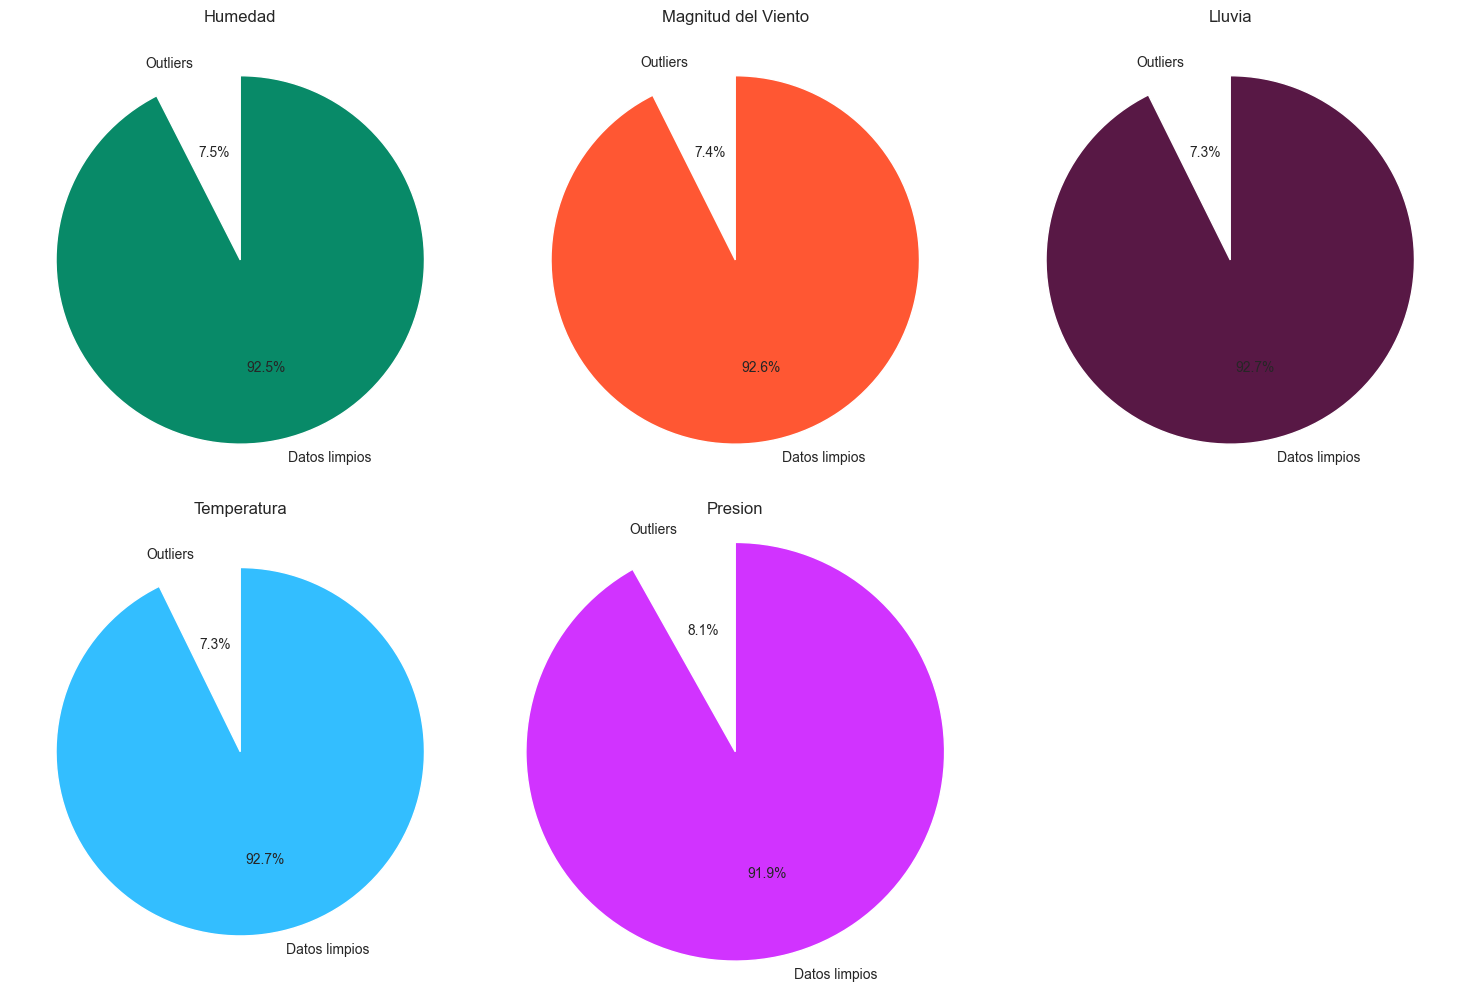

In [423]:
# Preparar los datos para el gráfico
labels = ['Outliers', 'Datos limpios']

sizes_hum = [len(humedad_filtrada), cant_total_datos - len(humedad_filtrada)]
sizes_viento = [len(mag_viento_filtrado), cant_total_datos - len(mag_viento_filtrado)]
sizes_lluvia = [len(lluvia_filtrada), cant_total_datos - len(lluvia_filtrada)]
sizes_temp = [len(temperatura_filtrada), cant_total_datos - len(temperatura_filtrada)]
sizes_pres = [len(presion_filtrada), cant_total_datos - len(presion_filtrada)]

# Crear el gráfico con dos pie charts
fig = plt.figure(figsize=(15,10))

# Pie chart para la Humedad
ax1 = fig.add_subplot(2,3,1)
ax1.pie(sizes_hum, labels=labels, autopct='%1.1f%%', startangle=90, colors=['white', '#088A68'], radius=1.0)
ax1.set_title('Humedad')

# Pie chart para la Magnitud del Viento
ax2 = fig.add_subplot(2,3,2)
ax2.pie(sizes_viento, labels=labels, autopct='%1.1f%%', startangle=90, colors=['white', '#ff5733'], radius=1.0 )
ax2.set_title('Magnitud del Viento')

# Pie chart para la Lluvia 
ax3 = fig.add_subplot(2,3,3)
ax3.pie(sizes_lluvia, labels=labels, autopct='%1.1f%%', startangle=90, colors=['white', '#581845'], radius=1.0 )
ax3.set_title('Lluvia')

# Pie chart para la Temperatura
ax3 = fig.add_subplot(2,3,4)
ax3.pie(sizes_temp, labels=labels, autopct='%1.1f%%', startangle=90, colors=['white', '#33beff'], radius=1.0 )
ax3.set_title('Temperatura')

# Pie chart para la Presión
ax3 = fig.add_subplot(2,3,5)
ax3.pie(sizes_pres, labels=labels, autopct='%1.1f%%', startangle=90, colors=['white', '#d133ff'], radius=1.0 )
ax3.set_title('Presion')

# Asegurar que ambos gráficos sean circulares
plt.axis('equal')
plt.tight_layout()
plt.show()

In [420]:
# Filtrado
df = df[(df['hum']>0) & (df['hum']<100)]
df = df[(df['mag_viento']<=20)]
df = df[df['lluvia'] < 10000]
df = df[df['temp'] < 40]
df = df[(df['presion'] >= 500) & (df['presion']<=600)]

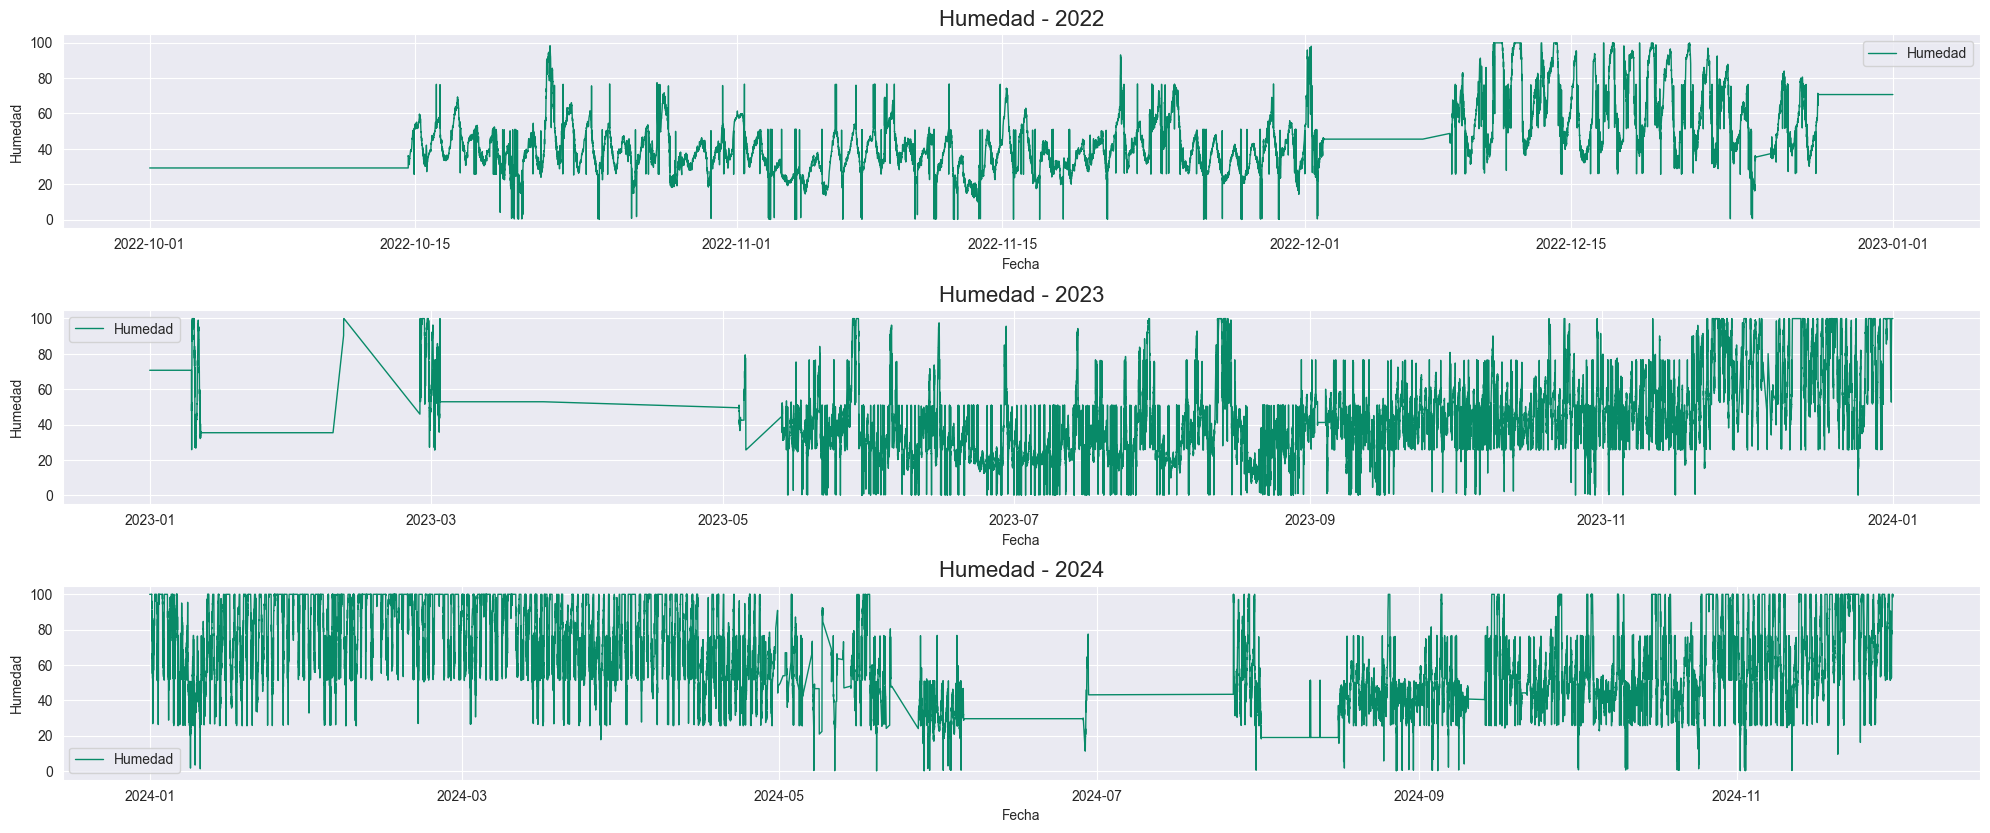

In [414]:
plot_data(df=df, variable='hum', etiqueta='Humedad', color="#088A68")

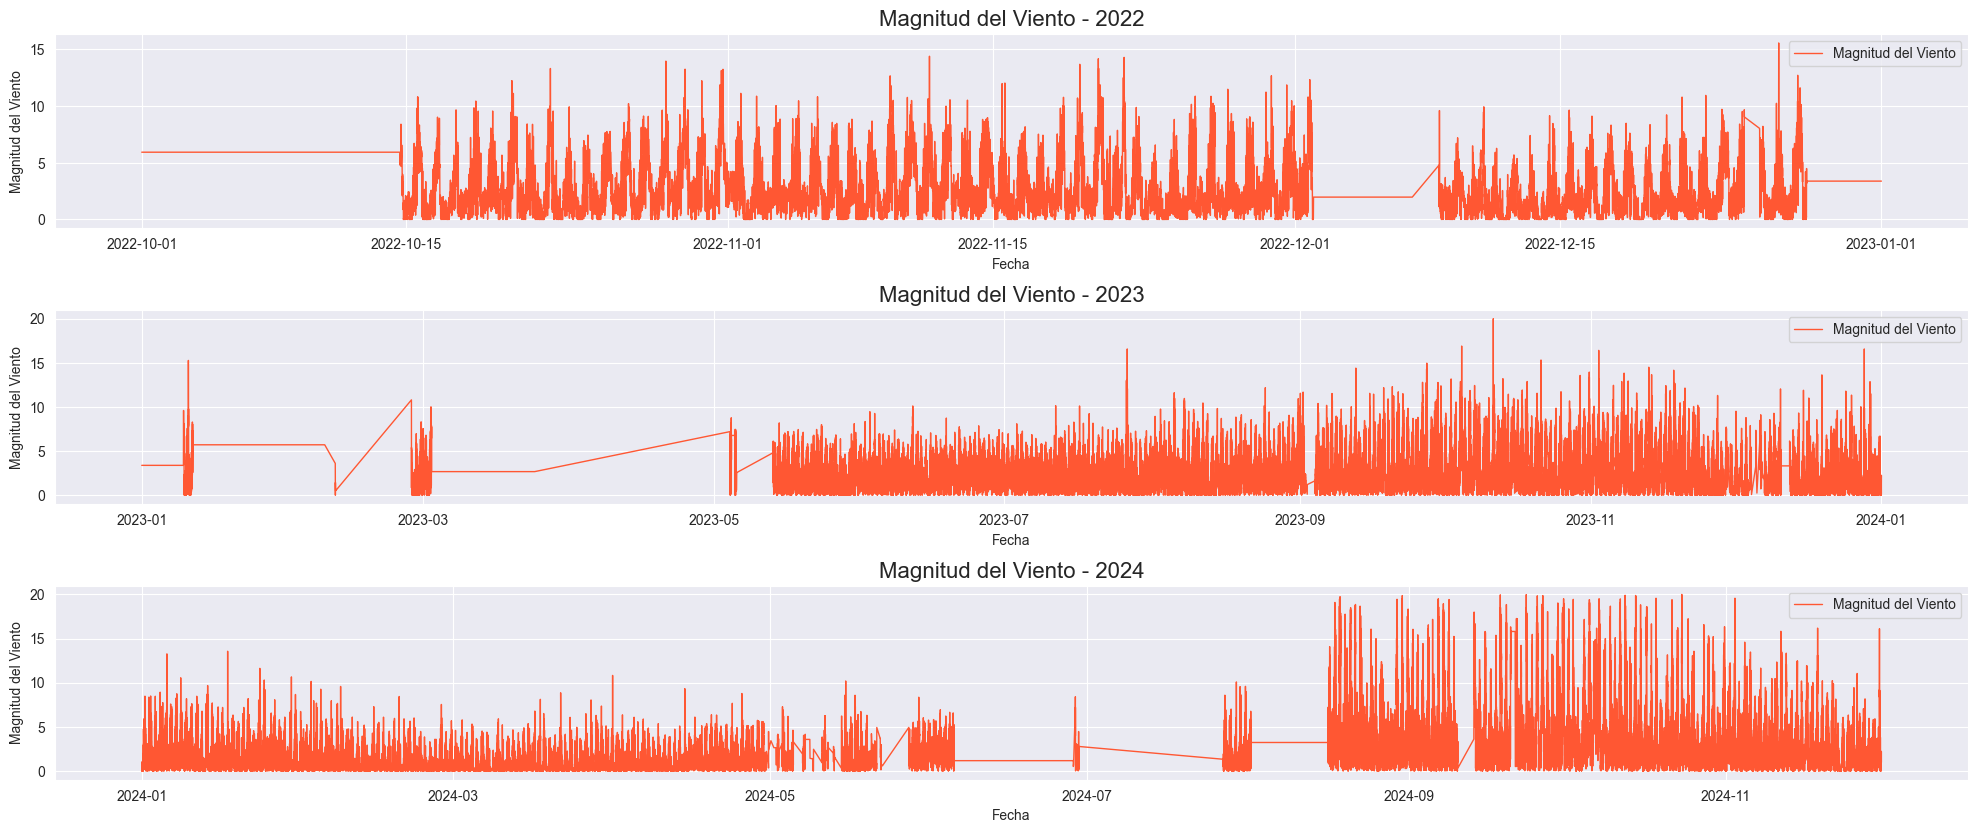

In [416]:
plot_data(df=df, variable='mag_viento', etiqueta='Magnitud del Viento', color="#ff5733")

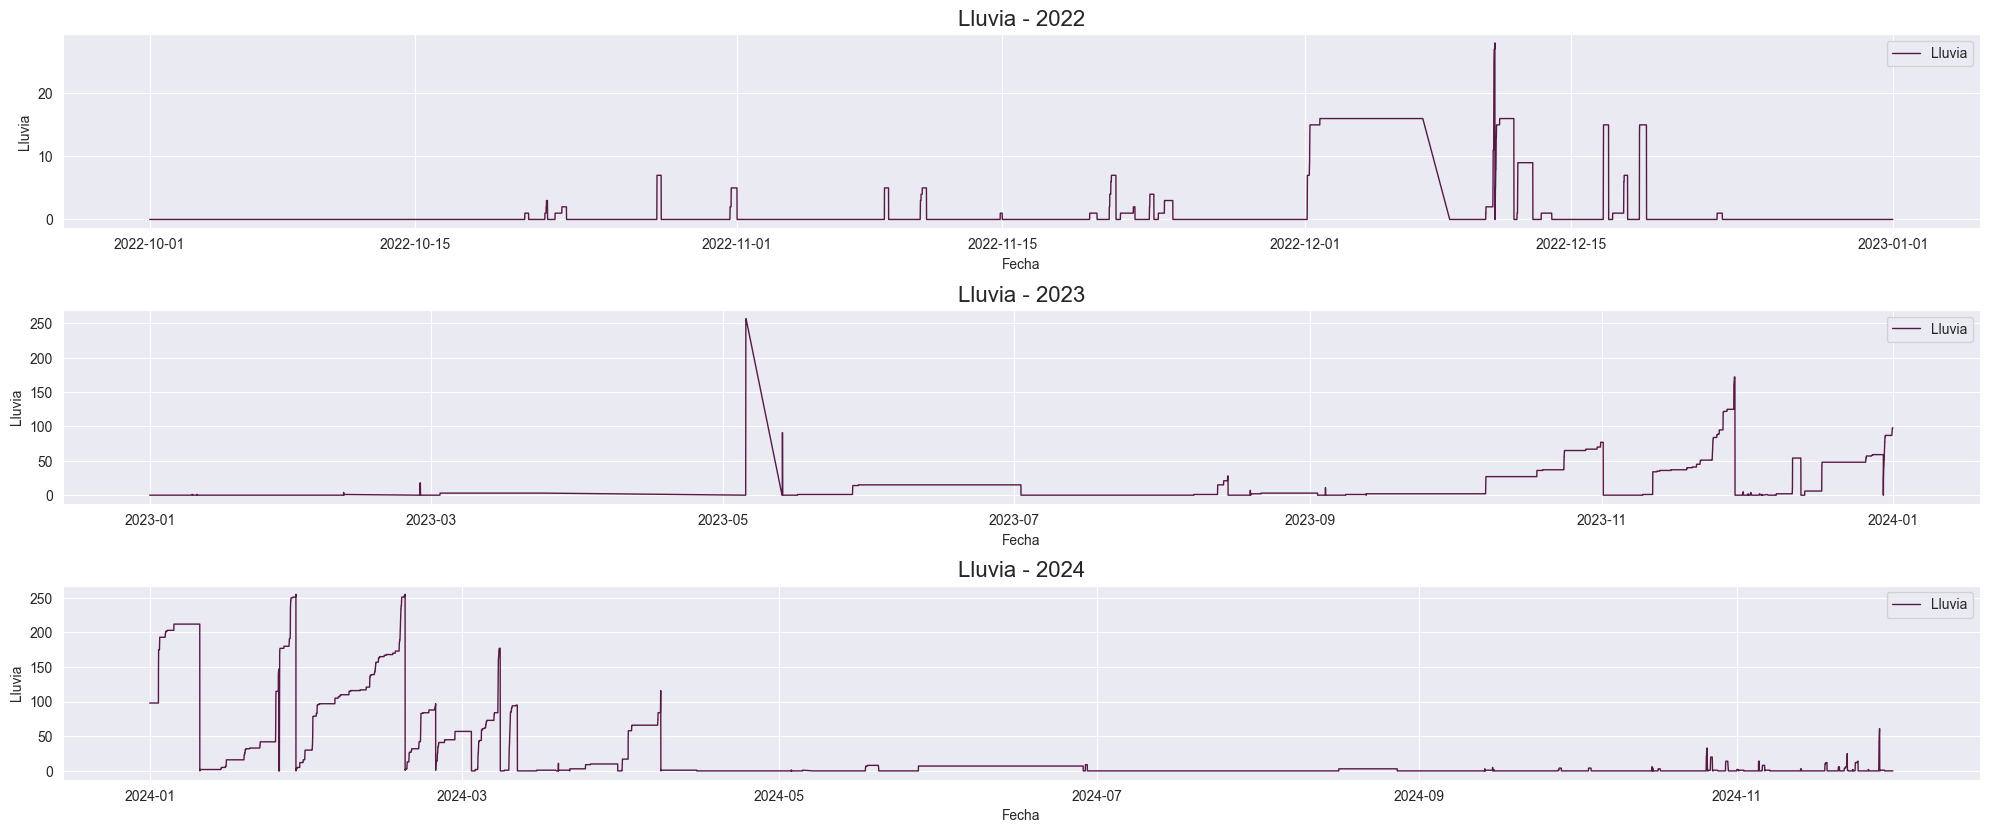

In [419]:
plot_data(df=df, variable='lluvia', etiqueta='Lluvia', color="#581845")

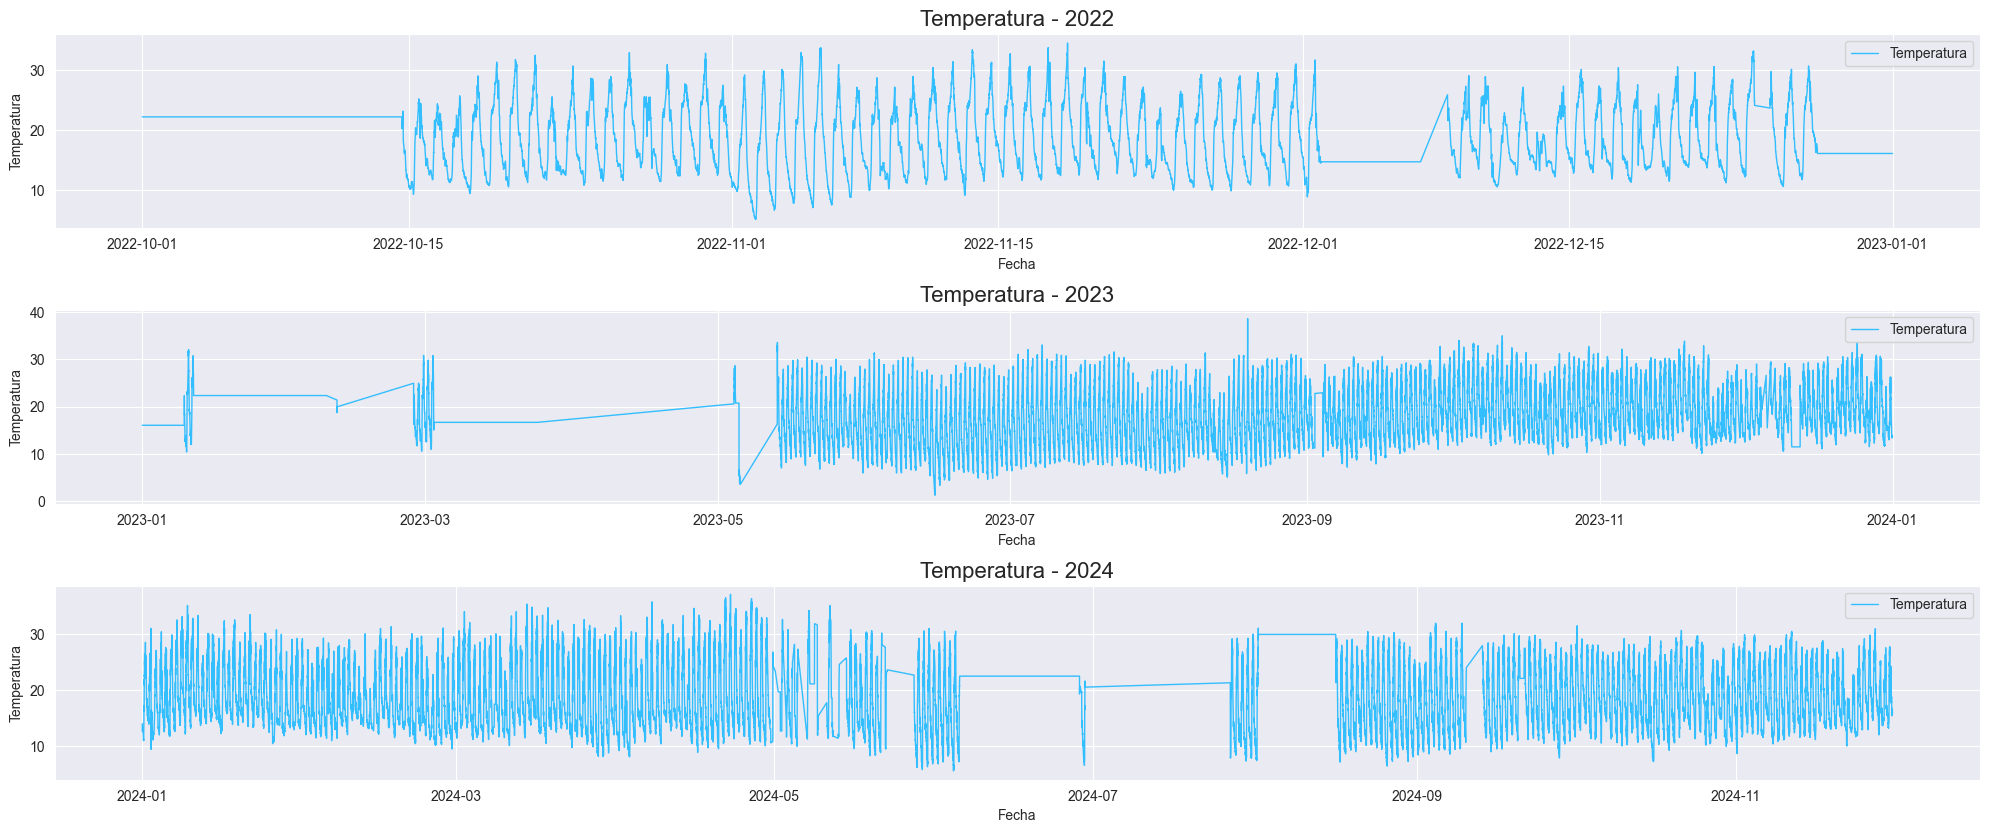

In [421]:
plot_data(df=df, variable='temp', etiqueta='Temperatura', color="#33beff")

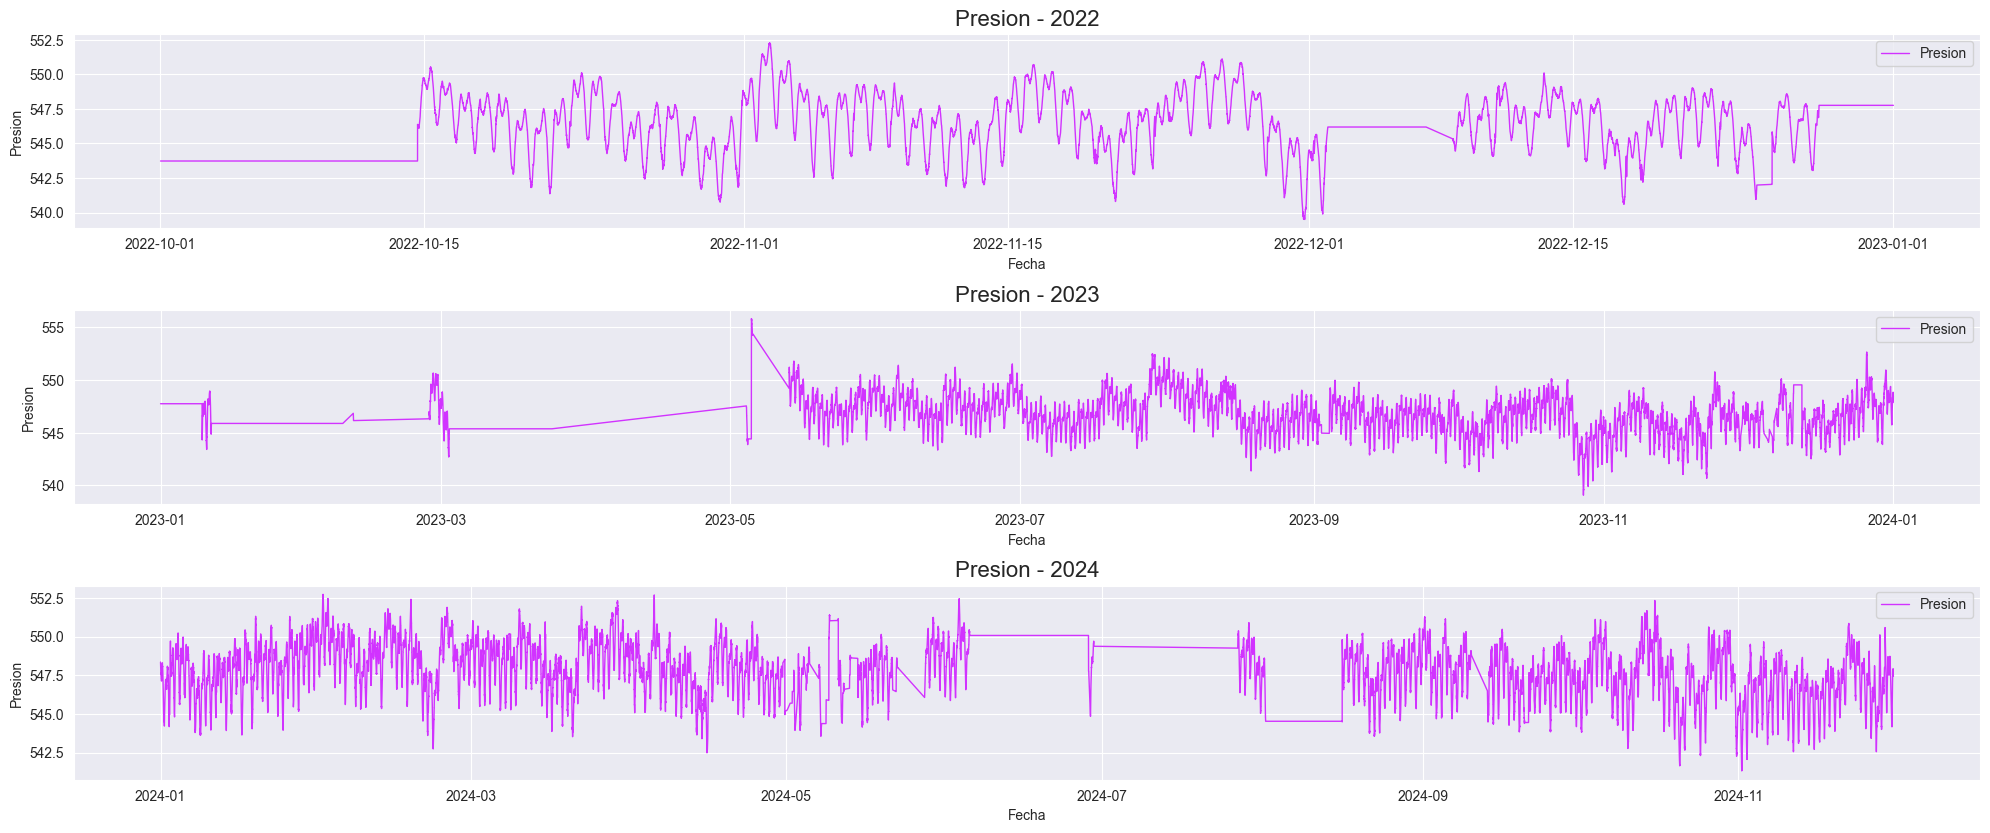

In [422]:
plot_data(df=df, variable='presion', etiqueta='Presion', color="#d133ff")

<Axes: >

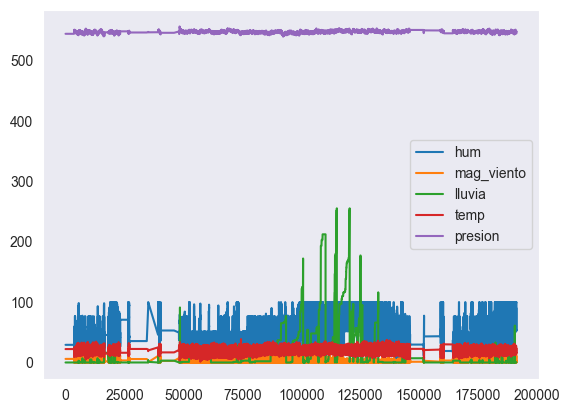

In [449]:
df[['hum', 'mag_viento', 'lluvia', 'temp', 'presion']].plot()

<Axes: >

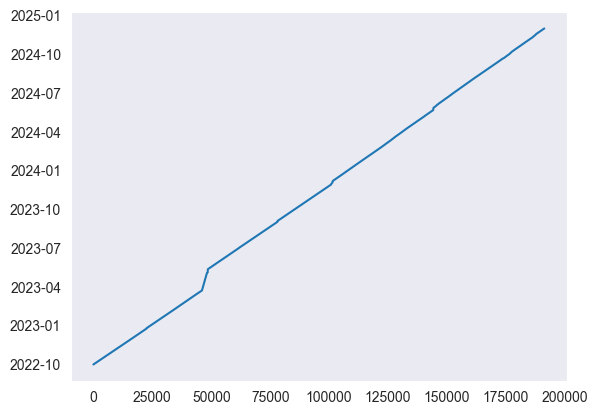

In [450]:
df['fecha'].plot()

In [447]:
# temp_df = df.drop_duplicates(keep='first')
# temp_df
# plot_data(dataframe=df.drop_duplicates(keep='first', subset=["lluvia"]), variable='lluvia', etiqueta='Presion', color="#d133ff")

In [437]:
plot_data(df=df, variable='lluvia', etiqueta='Lluvia', color="#581845")

(171048, 9)

In [340]:
df[(df['year']==2024) & (df['month']==5)]['lluvia'].describe()

count     6620.000000
mean       384.254532
std       3708.966707
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max      61680.000000
Name: lluvia, dtype: float64

In [363]:
# temp_df = df[(df['year']==2024) & (df['month']==5) & (df['day']>=2) & (df['day']<=2)]
# temp_df.groupby(['day']).count()
# temp_df.describe()

In [360]:
# temp_df['lluvia'].plot()
# sns.lineplot(data=temp_df,x = 'fecha', y = 'lluvia', linewidth = 1, linestyle = '-')

<Axes: >

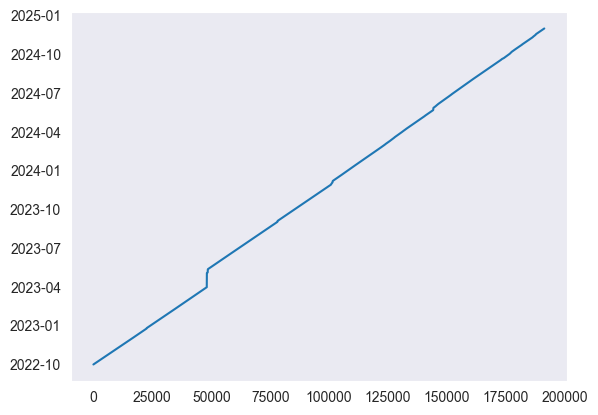

In [300]:
df['fecha'].plot()

In [286]:
df.shape

(191320, 9)

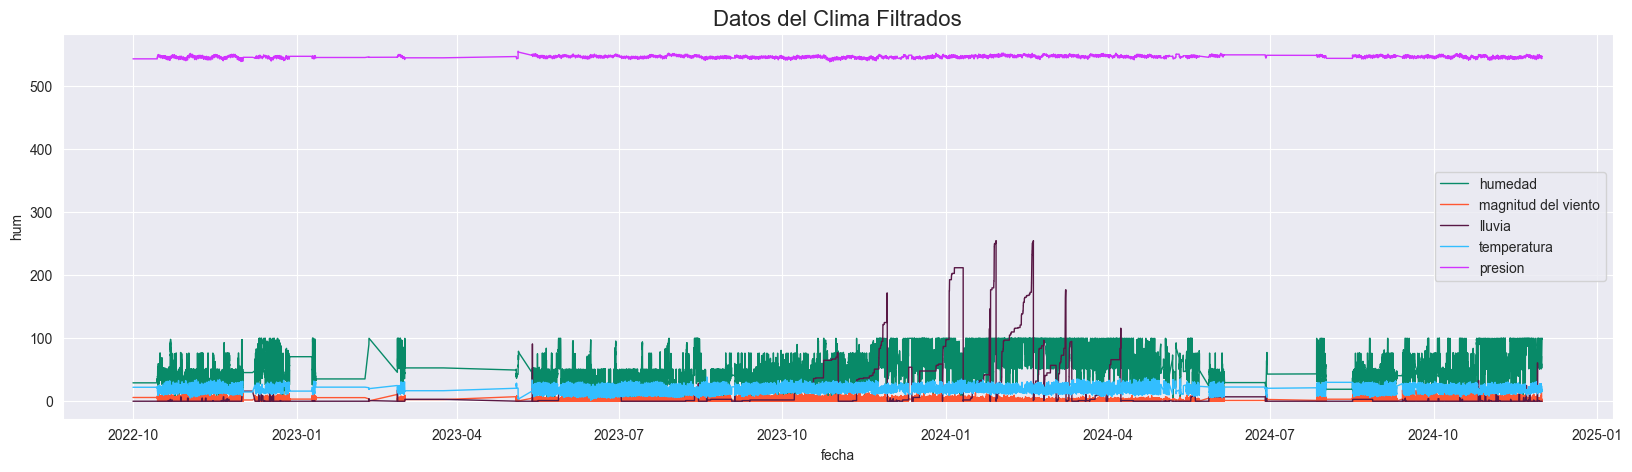

In [473]:
fig = plt.figure(figsize=(20,5))
sns.lineplot(data=df,x = 'fecha', y = 'hum', label='humedad', color="#088A68", linewidth = 1, linestyle = '-')
sns.lineplot(data=df,x = 'fecha', y = 'mag_viento', label='magnitud del viento', color="#ff5733", linewidth = 1, linestyle = '-')
sns.lineplot(data=df,x = 'fecha', y = 'lluvia', label='lluvia', color="#581845", linewidth = 1, linestyle = '-')
sns.lineplot(data=df,x = 'fecha', y = 'temp', label='temperatura', color="#33beff", linewidth = 1, linestyle = '-')
sns.lineplot(data=df,x = 'fecha', y = 'presion', label='presion', color="#d133ff", linewidth = 1, linestyle = '-')
plt.title("Datos del Clima Filtrados", fontsize=16)
plt.grid()

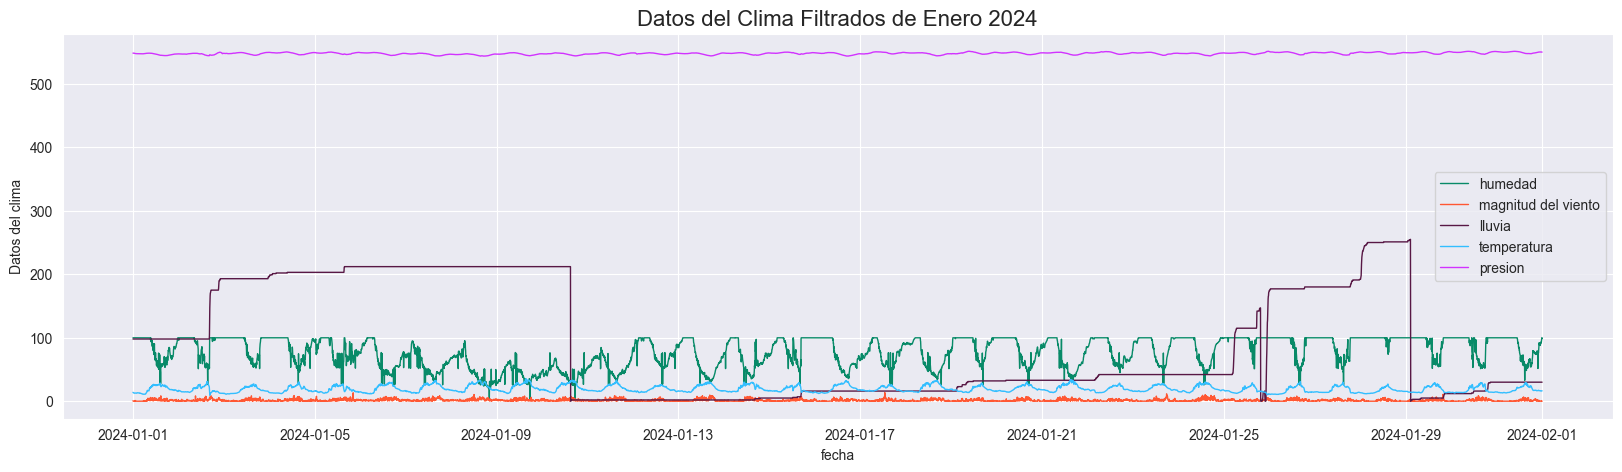

In [479]:
enero_2024_df = df[(df['year'] == 2024) & (df['month']==1)]

fig = plt.figure(figsize=(20,5))
sns.lineplot(data=enero_2024_df, x = 'fecha', y = 'hum', label='humedad', color="#088A68", linewidth = 1, linestyle = '-')
sns.lineplot(data=enero_2024_df, x = 'fecha', y = 'mag_viento', label='magnitud del viento', color="#ff5733", linewidth = 1, linestyle = '-')
sns.lineplot(data=enero_2024_df, x = 'fecha', y = 'lluvia', label='lluvia', color="#581845", linewidth = 1, linestyle = '-')
sns.lineplot(data=enero_2024_df, x = 'fecha', y = 'temp', label='temperatura', color="#33beff", linewidth = 1, linestyle = '-')
sns.lineplot(data=enero_2024_df, x = 'fecha', y = 'presion', label='presion', color="#d133ff", linewidth = 1, linestyle = '-')
plt.title("Datos del Clima Filtrados de Enero 2024", fontsize=16)
plt.ylabel('Datos del clima')
plt.grid()

### 2. Datos del mes ENERO 2024

In [474]:
# Seleccionar el mes
enero_2024_df

,mag_viento,hum,lluvia,temp,presion,fecha,month,year,day
107849,0.74,99.9,98,13.95,548.36,2024-01-01 00:00:59,1,2024,1
107850,0.10,99.9,98,13.76,548.30,2024-01-01 00:06:23,1,2024,1
107851,0.01,99.9,98,13.51,548.28,2024-01-01 00:11:48,1,2024,1
107852,0.01,99.9,98,13.35,548.24,2024-01-01 00:17:13,1,2024,1
107853,0.04,99.9,98,13.26,548.21,2024-01-01 00:22:40,1,2024,1
...,...,...,...,...,...,...,...,...,...
115876,0.96,93.6,30,16.25,550.06,2024-01-31 23:37:26,1,2024,31
115877,0.57,96.0,30,16.45,550.00,2024-01-31 23:42:55,1,2024,31
115878,0.01,99.3,30,16.32,550.01,2024-01-31 23:48:21,1,2024,31
115879,0.00,98.5,30,16.24,549.97,2024-01-31 23:53:48,1,2024,31


In [ ]:
# el numero de datos que se tiene por dia
enero_2024_df.groupby(['day']).count()

,mag_viento,hum,lluvia,temp,presion,fecha,month,year
day,,,,,,,,
1,249,249,249,249,249,249,249,249
2,252,252,252,252,252,252,252,252
3,259,259,259,259,259,259,259,259
4,251,251,251,251,251,251,251,251
5,260,260,260,260,260,260,260,260
6,258,258,258,258,258,258,258,258
7,258,258,258,258,258,258,258,258
8,258,258,258,258,258,258,258,258
9,261,261,261,261,261,261,261,261


#### 2.1. Maxima, media y minima temperatura por día


In [516]:
max_med_min_temp = pd.DataFrame({
  'minima': [enero_2024_df[enero_2024_df['day']==i]['temp'].min() for i in range(1, 32)],
  'media':[round(enero_2024_df[enero_2024_df['day']==i]['temp'].median(), 2) for i in range(1, 32)],
  'max': [enero_2024_df[enero_2024_df['day']==i]['temp'].max() for i in range(1, 32)]
})
max_med_min_temp

,minima,media,max
0,10.94,18.10,28.57
1,9.35,15.73,31.10
2,11.07,16.92,27.16
3,11.94,17.06,30.48
4,12.50,16.92,27.68
5,11.71,19.07,29.93
6,12.55,20.09,32.62
7,13.69,21.39,33.22
8,12.09,20.87,35.22
9,13.15,20.72,32.92


#### 2.2. Precipitacion plubial acumulada diaria

In [517]:
lluvia_acum = pd.DataFrame({
  'lluvia_acum': [enero_2024_df[enero_2024_df['day']==i]['lluvia'].sum() for i in range(1, 32)],
})
lluvia_acum

,lluvia_acum
0,24402
1,31248
2,50007
3,50791
4,53600
5,54696
6,54696
7,54696
8,55332
9,34950


#### 2.3. Presión atmosférica media diaria

In [518]:
presion_atm_media_diaria = pd.DataFrame({
  'presion_atm_media_diaria': [round(enero_2024_df[enero_2024_df['day']==i]['presion'].median(), 2) for i in range(1, 32)],
})
presion_atm_media_diaria

,presion_atm_media_diaria
0,547.16
1,547.08
2,547.91
3,548.73
4,548.51
5,547.95
6,546.80
7,546.16
8,546.94
9,547.05


#### 2.4. Velocidad media y máxima del viento por día

In [519]:
med_max_viento = pd.DataFrame({
  'media': [enero_2024_df[enero_2024_df['day']==i]['mag_viento'].median() for i in range(1, 32)],
  'max'  : [enero_2024_df[enero_2024_df['day']==i]['mag_viento'].max() for i in range(1, 32)]
})
med_max_viento

,media,max
0,1.080,8.47
1,1.180,8.49
2,0.710,8.46
3,1.020,8.92
4,1.335,13.26
5,1.645,7.58
6,1.440,8.74
7,1.835,10.55
8,1.510,8.18
9,1.370,7.61


### 3. Datos Acumulados del mes

#### 3.1. Temperatura máxima, media y mínima mensual

In [524]:

pd.DataFrame({
  'maxima':[max_med_min_temp['max'].max()],
  'media':[max_med_min_temp['media'].median()],
  'minima':[max_med_min_temp['minima'].min()]
})
# max_med_min_temp

,maxima,media,minima
0,35.22,18.1,9.35


#### 3.2. Precipitacion pluvial acumulada mensual

In [529]:
pd.DataFrame({
  'lluvia_acum':[lluvia_acum['lluvia_acum'].sum()],
})

,lluvia_acum
0,733257


#### 3.3. Presión atmosférica media mensual

In [533]:
pd.DataFrame({
  'presion_atm_media_mensual':[presion_atm_media_diaria['presion_atm_media_diaria'].median()],
})

,presion_atm_media_mensual
0,548.28


#### 3.4. Velocidad media y máxima del viento mensual

In [535]:
pd.DataFrame({
  'media_viento_mensual' : [med_max_viento['media'].median()],
  'max_viento_mensual'   : [med_max_viento['max'].max()]
})


,media_viento_mensual,max_viento_mensual
0,0.98,13.56


### 4. Anális de relación de variables